In [59]:
import shap
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
with open("../T23_shap_ml/S01_shap_calc.pkl", "rb") as f:
    data = pickle.load(f)
    shaps_ml = data["shaps"]
    infos_ml = data["infos"]

In [61]:
pd.DataFrame.from_dict(infos_ml)

,model,model_params,test_size,random_state
0,DTR,"{'criterion': 'squared_error', 'splitter': 'ra...",0.3,4
1,EN,"{'alpha': 0.03388469103413104, 'l1_ratio': 0.4...",0.3,5
2,GBR,"{'n_estimators': 134, 'learning_rate': 0.02748...",0.3,4
3,KNR,"{'n_neighbors': 36, 'weights': 'distance', 'al...",0.3,5
4,RFR,"{'n_estimators': 60, 'max_depth': 5, 'min_samp...",0.3,5
5,SVR,"{'kernel': 'linear', 'C': 0.012708183589980318...",0.3,5
6,XGBR,"{'n_estimators': 229, 'max_depth': 8, 'learnin...",0.3,5


In [62]:
shap_values_list = []

In [63]:
idxs = [1, 2, 4, 6]
for idx in idxs:
    shap_values = shaps_ml[idx]["shap_values"]
    model = shaps_ml[idx]["model"]
    shap_values_list.append(shap_values)
    print(f"Model: {model}")

Model: EN
Model: GBR
Model: RFR
Model: XGBR


In [64]:
with open("../T24_shap_tabPFN/S02_shap_values.pkl", "rb") as f:
    data = pickle.load(f)
    shaps_tabPFN = data["shaps"]


shap_values_list.append(shaps_tabPFN)

In [65]:
# Combine SHAP values
feature_names = shap_values_list[0].feature_names

# Combine values
combined_shape_values = np.vstack([sv.values for sv in shap_values_list])
combined_shape_values.shape

# Combine base values
combined_base_values = np.concatenate([sv.base_values for sv in shap_values_list])
combined_base_values.shape

# Combine data (feature values)
combined_data = np.vstack([sv.data for sv in shap_values_list])
combined_data.shape

(1554, 20)

In [66]:
shap_values = shap.Explanation(
    values=combined_shape_values, 
    base_values=combined_base_values,
    data=combined_data,
    feature_names=shap_values_list[0].feature_names,
)

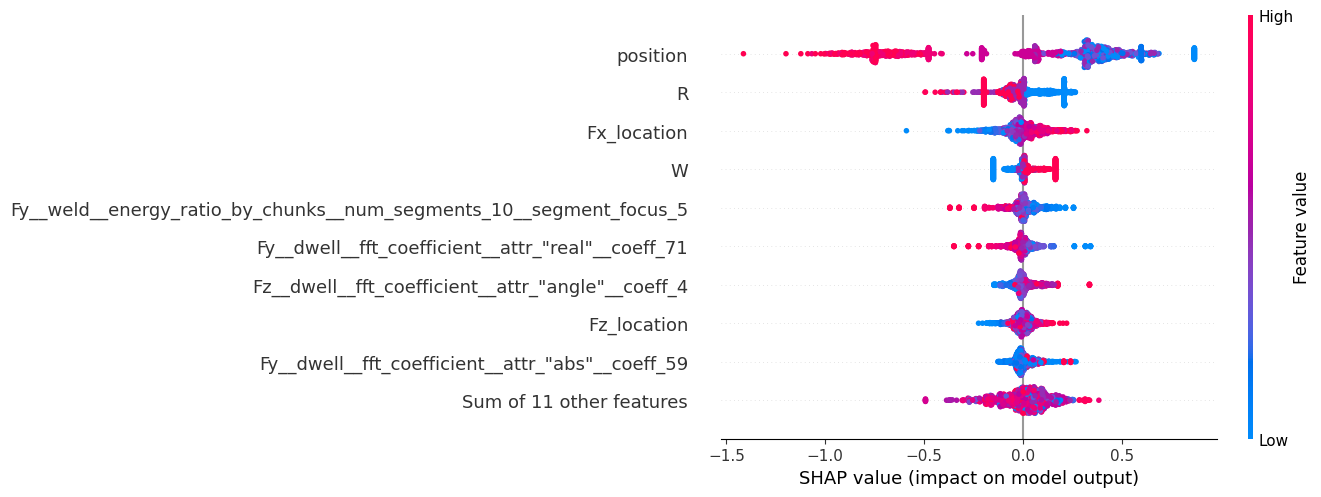

In [67]:
shap.plots.beeswarm(shap_values)

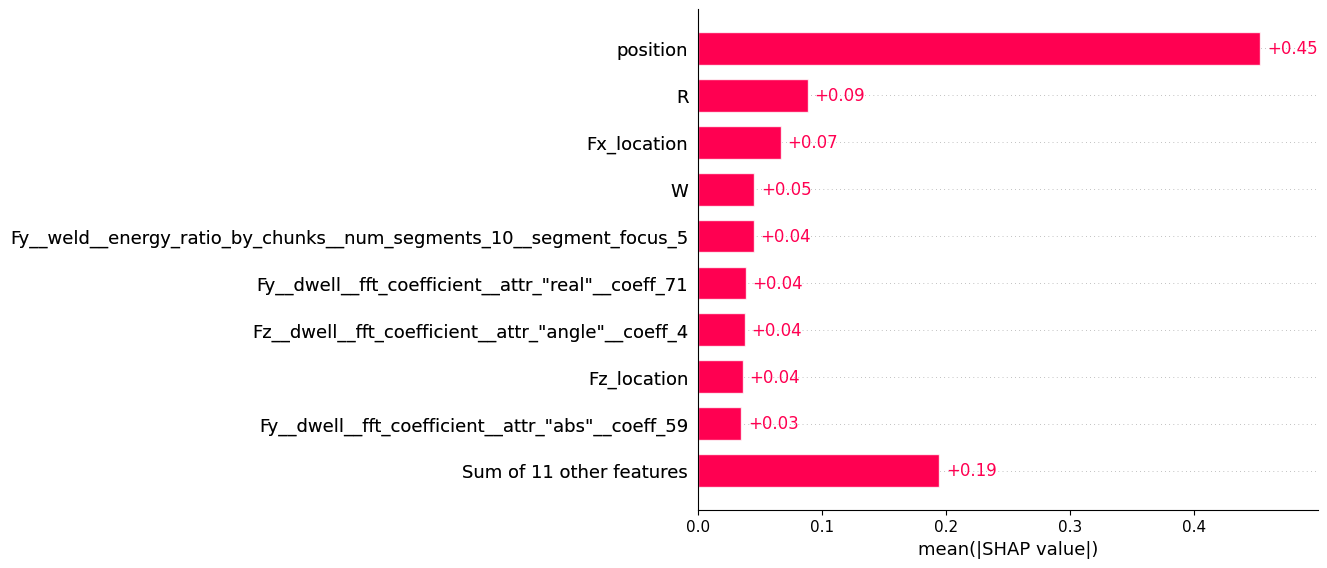

In [68]:
# Plot SHAP bar plot
shap.plots.bar(shap_values)

In [69]:
shap_values.feature_names

['D',
 'Fx__dwell__ar_coefficient__coeff_0__k_10',
 'Fx__dwell__fft_coefficient__attr_"abs"__coeff_11',
 'Fx__weld__change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.2',
 'Fx__weld__fft_coefficient__attr_"abs"__coeff_5',
 'Fx_location',
 'Fy__dwell__fft_coefficient__attr_"abs"__coeff_59',
 'Fy__dwell__fft_coefficient__attr_"real"__coeff_71',
 'Fy__weld__change_quantiles__f_agg_"mean"__isabs_True__qh_0.4__ql_0.0',
 'Fy__weld__energy_ratio_by_chunks__num_segments_10__segment_focus_5',
 'Fz__dwell__fft_coefficient__attr_"angle"__coeff_4',
 'Fz__dwell__fft_coefficient__attr_"real"__coeff_4',
 'Fz__weld__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"var"',
 'Fz__weld__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.4',
 'Fz_location',
 'Mz__dwell__augmented_dickey_fuller__attr_"pvalue"__autolag_"AIC"',
 'Mz__dwell__augmented_dickey_fuller__attr_"teststat"__autolag_"AIC"',
 'R',
 'W',
 'position']

,shap_value,feature_value
0,-0.746807,1.518433
1,0.865007,-1.491827
2,0.059100,0.013303
3,0.596371,-0.990117
4,0.596371,-0.990117
...,...,...
1549,-0.730626,1.012931
1550,0.273104,0.020672
1551,0.392642,-0.971587
1552,0.231385,-1.467716


Text(0.5, 1.0, 'position')

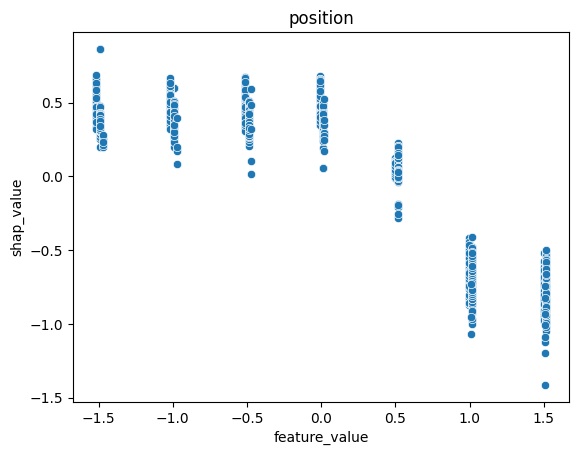

In [74]:
feature_name = "position"
idx = shap_values.feature_names.index(feature_name)
df_plot = pd.DataFrame({"shap_value":shap_values.values[:, idx],  "feature_value": shap_values.data[:, idx]})
display(df_plot)
sns.scatterplot(data=df_plot, x="feature_value", y="shap_value")
plt.title(feature_name)

,shap_value,feature_value
0,-0.199300,1.248345
1,-0.199300,1.248345
2,-0.199300,1.248345
3,-0.199300,1.248345
4,0.207435,-1.229573
...,...,...
1549,-0.225549,-0.050953
1550,-0.417073,1.171912
1551,-0.224065,-0.050953
1552,-0.247422,-0.050953


Text(0.5, 1.0, 'R')

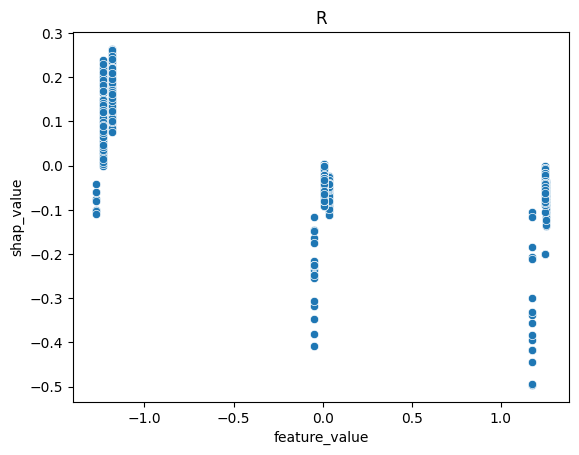

In [75]:
feature_name = "R"
idx = shap_values.feature_names.index(feature_name)
df_plot = pd.DataFrame({"shap_value":shap_values.values[:, idx],  "feature_value": shap_values.data[:, idx]})
display(df_plot)
sns.scatterplot(data=df_plot, x="feature_value", y="shap_value")
plt.title(feature_name)

,shap_value,feature_value
0,-0.150801,-1.224745
1,-0.150801,-1.224745
2,0.006283,0.000000
3,-0.150801,-1.224745
4,-0.150801,-1.224745
...,...,...
1549,0.074641,0.036930
1550,0.098936,1.255605
1551,0.135923,1.255605
1552,0.044635,-1.181745


Text(0.5, 1.0, 'W')

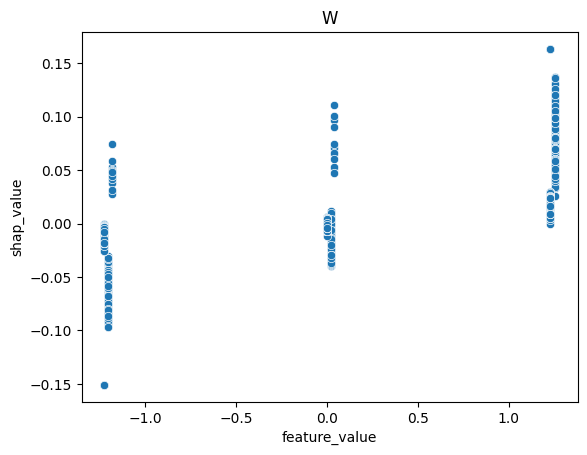

In [76]:
feature_name = "W"
idx = shap_values.feature_names.index(feature_name)
df_plot = pd.DataFrame({"shap_value":shap_values.values[:, idx],  "feature_value": shap_values.data[:, idx]})
display(df_plot)
sns.scatterplot(data=df_plot, x="feature_value", y="shap_value")
plt.title(feature_name)

,shap_value,feature_value
0,-0.194905,1.584542
1,-0.194905,1.584542
2,0.185793,-1.439309
3,0.079637,-0.596125
4,-0.018564,0.183882
...,...,...
1549,-0.023451,3.111439
1550,-0.006563,0.808123
1551,0.028535,-0.697288
1552,0.003341,-0.293818


<Axes: xlabel='feature_value', ylabel='shap_value'>

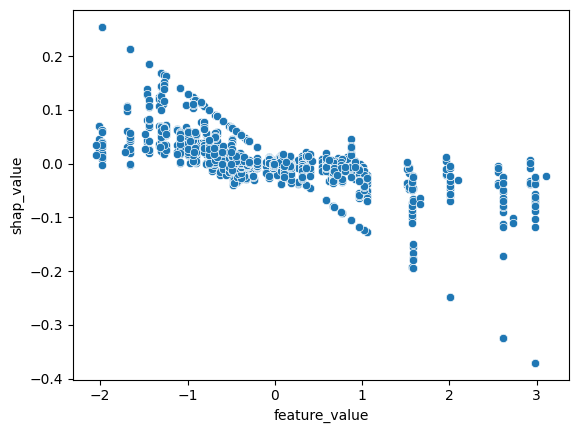

In [73]:
feature_name = "Fy__weld__energy_ratio_by_chunks__num_segments_10__segment_focus_5"
idx = shap_values.feature_names.index(feature_name)
df_plot = pd.DataFrame({"shap_value":shap_values.values[:, idx],  "feature_value": shap_values.data[:, idx]})
display(df_plot)
sns.scatterplot(data=df_plot, x="feature_value", y="shap_value")